In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_pickle('../data/processed/rumc.pkl')
df

% CD4+ T-Lymfocyten (CD3+CD4+)  \
patientprimarymrn study                                   
10000             st000                             NaN   
                  st001                             NaN   
10001             st000                             NaN   
10002             st000                             NaN   
10003             st000                             NaN   
...                                                 ...   
10723             st000                             NaN   
10724             st000                             NaN   
10725             st000                             NaN   
10726             st000                             NaN   
10727             st000                             NaN   

                         % CD8+ T-Lymfocyten (CD3+CD8+)  \
patientprimarymrn study                                   
10000             st000                             NaN   
                  st001                             NaN   
10001             st000                             NaN   
10002             st000                             NaN   
10003             st000                             NaN   
...                                                 ...   
10723             st000                             NaN   
10724             st000                             NaN   
10725             st000                             NaN   
10726             st000                             NaN   
10727             st000                             NaN   

                         % T-lymfocyten (CD3+)  (Pseudo) Pelger Huet  \
patientprimarymrn study                                                
10000             st000                    NaN                   NaN   
                  st001                    NaN                   NaN   
10001             st000                    NaN                   NaN   
10002             st000                    NaN                   NaN   
10003             st000                    NaN                   NaN   
...                                        ...                   ...   
10723             st000                    NaN                   NaN   
10724             st000                    NaN                   NaN   
10725             st000                    NaN                   NaN   
10726             st000                    NaN                   NaN   
10727             st000                    NaN                   NaN   

                         (pseudo) Pelger Huet  3-Methoxytyramine  \
patientprimarymrn study                                            
10000             st000                   NaN                NaN   
                  st001                   NaN                NaN   
10001             st000                   NaN                NaN   
10002             st000                   NaN                NaN   
10003             st000                   NaN                NaN   
...                                       ...                ...   
10723             st000                   NaN                NaN   
10724             st000                   NaN                NaN   
10725             st000                   NaN                NaN   
10726             st000                   NaN                NaN   
10727             st000                   NaN                NaN   

                         5-HIAA/MMOL KREAT (24uurs Urine)  \
patientprimarymrn study                                     
10000             st000                               NaN   
                  st001                               NaN   
10001             st000                               NaN   
10002             st000                               NaN   
10003             st000                               NaN   
...                                                   ...   
10723             st000                               NaN   
10724             st000                               NaN   
10725             st000                               NaN

In [3]:
df_rumc_merged = df.copy()
df_rumc_merged.columns = df.columns.str.replace(r'\(.+?\)', '', regex=True).str.strip()

In [4]:
df_rumc_merged.columns[df_rumc_merged.columns.duplicated()].unique()

Index(['Pelger Huet', 'A'', 'ALAT', 'ASAT', 'AVA', 'AVA-I', 'Albumine',
       'Albumine nefelometrisch', 'Alfa-1-antitrypsine', 'Algemene kweek',
       ...
       'SV', 'Transferrine', 'Triglyceriden', 'Tuberculose kweek', 'Uraat',
       'Ureum', 'VZV IgG', 'Vrije kappa immunoblot', 'hCG+hCGß', 'pH'],
      dtype='object', length=115)

In [19]:
from pandas.api.types import is_numeric_dtype
def aggregate(x: pd.Series):
#     if is_numeric_dtype(x.dtypes[0]):
#         return x.mean(axis=1)
    result = x.apply(lambda y: next(z for z in y.values if not pd.isna(z)) if not y.isna().all() else np.nan, axis=1)
    if len(result.shape) == 2:
        print(x)
        print(result)
        x.apply(lambda y: print(next(z for z in y.values if not pd.isna(z)) if not y.isna().all() else np.nan), axis=1)
        error()
#     print(result.shape)
    return result
#     return x.mode(axis=1)
df_rumc_merged2 = df_rumc_merged.groupby(df_rumc_merged.columns, axis=1).agg(aggregate)

In [20]:
df_rumc_merged2

% CD4+ T-Lymfocyten  % CD8+ T-Lymfocyten  \
patientprimarymrn study                                             
10000             st000                  NaN                  NaN   
                  st001                  NaN                  NaN   
10001             st000                  NaN                  NaN   
10002             st000                  NaN                  NaN   
10003             st000                  NaN                  NaN   
...                                      ...                  ...   
10723             st000                  NaN                  NaN   
10724             st000                  NaN                  NaN   
10725             st000                  NaN                  NaN   
10726             st000                  NaN                  NaN   
10727             st000                  NaN                  NaN   

                         % T-lymfocyten  3-Methoxytyramine  5-HIAA/MMOL KREAT  \
patientprimarymrn study                                                         
10000             st000             NaN                NaN                NaN   
                  st001             NaN                NaN                NaN   
10001             st000             NaN                NaN                NaN   
10002             st000             NaN                NaN                NaN   
10003             st000             NaN                NaN                NaN   
...                                 ...                ...                ...   
10723             st000             NaN                NaN                NaN   
10724             st000             NaN                NaN                NaN   
10725             st000             NaN                NaN                NaN   
10726             st000             NaN                NaN                NaN   
10727             st000             NaN                NaN                NaN   

                         6-MMPR  6-MMPR-R  6-TGN  6-TGN-R  A Dur  ...  \
patientprimarymrn study                                           ...   
10000             st000     NaN       NaN    NaN      NaN    NaN  ...   
                  st001     NaN       NaN    NaN      NaN    NaN  ...   
10001             st000     NaN       NaN    NaN      NaN    NaN  ...   
10002             st000     NaN       NaN    NaN      NaN    NaN  ...   
10003             st000     NaN       NaN    NaN      NaN    NaN  ...   
...                         ...       ...    ...      ...    ...  ...   
10723             st000     NaN       NaN    NaN      NaN    NaN  ...   
10724             st000     NaN       NaN    NaN      NaN    NaN  ...   
10725             st000     NaN       NaN    NaN      NaN    NaN  ...   
10726             st000     NaN       NaN    NaN      NaN    NaN  ...   
10727             st000     NaN       NaN    NaN      NaN    NaN  ...   

                         vis_feature_55  vis_feature_56 vis_feature_57  \
patientprimarymrn study                                                  
10000             st000       -0.813246       -0.504452      -0.505107   
                  st001       -0.925937       -0.690218      -0.677172   
10001             st000       -0.836391       -0.776165      -0.778493   
10002             st000       -0.787955       -0.497450      -0.507996   
10003             st000        0.216364       -0.512881      -0.514179   
...                                 ...             ...            ...   
10723             st000       -1.268456       -0.884078      -0.867174   
10724             st000       -0.443926       -0.548851      -0.554204   
10725             st000       -0.634042       -0.594288      -0.594998   
10726             st000       -1.165479       -0.828100      -0.826074   
10727             st000       -0.669558       -0.561095      -0.561070   

                         vis_feature_58  vis_feature_59  vis_feature_6  \
patientprimarymrn study                                                  
10000       

In [566]:
df.vis_feature_54.isna().sum()

18

In [567]:
(~df.vis_feature_54.isna()).sum()

796

In [568]:
embeddings = pd.read_csv('lightly_outputs/2021-04-09/21-31-09/embeddings.csv')
embeddings

,filenames,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,...,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30,embedding_31,labels
0,10000_st000_0_amax_0.tif,0.415647,0.297086,1.316081,0.788634,0.486894,0.109878,-0.162618,-0.791920,0.494150,...,0.984554,-0.271141,-1.965772,0.364389,1.062450,-1.231541,0.778109,0.539904,0.561329,0
1,10000_st000_0_amax_1.tif,0.364086,0.152952,1.426036,0.773272,0.594616,0.006639,-0.210791,-0.888482,0.553705,...,0.876194,-0.179239,-2.060027,0.388900,1.011984,-1.213418,0.926347,0.367319,0.382563,0
2,10000_st000_0_amax_10.tif,-0.184813,-0.391759,2.377511,1.041792,0.183497,-0.029780,-0.290941,-0.820564,0.773227,...,0.763743,0.591490,-3.688890,0.725275,0.131004,-0.654046,0.005884,1.083567,0.305937,0
3,10000_st000_0_amax_11.tif,0.279182,-0.218303,1.766848,1.051818,0.466988,0.077929,0.027594,-0.754119,1.006048,...,1.014185,0.288427,-3.627154,1.017936,-0.001867,-0.816669,-0.025874,1.269285,0.802849,0
4,10000_st000_0_amax_12.tif,0.187614,-0.422918,1.723342,1.103564,0.428866,-0.001729,-0.328796,-0.353477,0.850605,...,0.886814,0.188211,-3.264836,1.058185,-0.187161,-0.869092,-0.303651,1.108140,1.014121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181615,10910_st000_2_median_5.tif,1.439560,0.902144,0.528547,0.715332,-0.294482,-0.177121,0.237167,-0.193410,1.074680,...,1.656369,-0.492296,-2.217545,1.843943,0.552676,-1.065905,0.029555,0.124070,-0.077958,0
181616,10910_st000_2_median_6.tif,1.860199,0.965517,0.321779,1.089052,-0.377771,-0.304352,0.080333,-0.042120,1.126888,...,1.740434,-0.410566,-1.998809,1.900693,0.320379,-1.030400,0.076571,-0.227485,0.025273,0
181617,10910_st000_2_median_7.tif,2.273072,1.215264,-0.506692,1.162811,-0.498992,-0.272197,0.637325,0.082584,1.214700,...,1.907308,-0.337353,-2.070009,1.987294,0.098314,-0.939915,-0.353760,-0.757807,0.010075,0
181618,10910_st000_2_median_8.tif,2.502774,0.673516,-0.466314,1.604033,0.485779,-0.043244,0.596081,-0.492008,1.128637,...,1.454082,-0.607034,-2.121280,1.200024,-0.585801,-1.246782,0.443309,-0.628881,0.744922,0


In [569]:
embeddings.filenames = embeddings.filenames.str.replace('.tif', '')

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [570]:
embeddings[['patientid', 'study', 'axis', 'agg', 'slab_id']] = embeddings.filenames.str.split('_', expand=True)

In [571]:
embeddings.patientid = embeddings.patientid.astype(np.int64)

In [572]:
embedding_wide = pd.pivot(embeddings, index=['patientid', 'study'], columns=['axis', 'agg', 'slab_id'], values=[f'embedding_{i}' for i in range(32)])
embedding_wide.columns = [' '.join(col).strip() for col in embedding_wide.columns.values]

In [573]:
embedding_wide

embedding_0 0 amax 0  embedding_0 0 amax 1  \
patientid study                                               
10000     st000              0.415647              0.364086   
          st001              0.154291              0.151303   
10001     st000              0.246872              0.077772   
10002     st000              0.724750              0.515263   
10003     st000              0.326396              0.174759   
...                               ...                   ...   
10906     st000              0.411778              0.225768   
10907     st000              0.354662              0.088828   
10908     st000              0.700014              0.669811   
10909     st000              0.641572              0.409379   
10910     st000              0.233309              0.077978   

                 embedding_0 0 amax 10  embedding_0 0 amax 11  \
patientid study                                                 
10000     st000              -0.184813               0.279182   
          st001              -0.002726               0.083999   
10001     st000              -0.246371              -0.171963   
10002     st000               0.102920               0.029351   
10003     st000               0.009117               0.140012   
...                                ...                    ...   
10906     st000               0.541923               0.301368   
10907     st000              -0.457596              -0.440738   
10908     st000               0.120811               0.064205   
10909     st000              -0.029662               0.108345   
10910     st000               0.114321               0.297025   

                 embedding_0 0 amax 12  embedding_0 0 amax 13  \
patientid study                                                 
10000     st000               0.187614              -0.160805   
          st001               0.903006               0.051706   
10001     st000              -0.335836              -0.305661   
10002     st000              -0.052675              -0.156197   
10003     st000               0.060721               0.011593   
...                                ...                    ...   
10906     st000              -0.012368               0.241228   
10907     st000              -0.208763              -0.344862   
10908     st000              -0.110430              -0.127154   
10909     st000               0.216064               0.040589   
10910     st000               0.151730               0.072748   

                 embedding_0 0 amax 14  embedding_0 0 amax 15  \
patientid study                                                 
10000     st000              -0.150247              -0.011124   
          st001              -0.147849               0.204407   
10001     st000              -0.229062              -0.020874   
10002     st000              -0.102656              -0.116009   
10003     st000               0.012010              -0.348887   
...                                ...                    ...   
10906     st000               0.137080              -0.255893   
10907     st000              -0.476252              -0.518091   
10908     st000              -0.176708              -0.307579   
10909     st000               0.000711              -0.172193   
10910     st000               0.122095               0.068548   

                 embedding_0 0 amax 16  embedding_0 0 amax 17  ...  \
patientid study                                                ...   
10000     st000               0.119934               0.099359  ...   
          st001               0.128067               0.229600  ...   
10001     st000               0.070782               0.466645  ...   
10002     st000               0.152986               0.134239  ...   
10003     st000              -0.288330              -0.359458  ...   
...                                ...                    ...  ...   
10906     st000               0.253287               0.255969  ...   
10907     st000              

In [574]:
embedding_wide.index.rename(['patientprimarymrn', 'study'], inplace=True)

In [575]:
embedding_full = embedding_wide.join(df)

In [576]:
df = embedding_full

In [579]:
df.drop(columns=df.columns[df.columns.str.startswith('vis_')], inplace=True)

In [21]:
df_train = df[df.part.isin(['train',])]
df_val = df[df.part.isin(['val'])]
df_test = df[df.part == 'test']

In [22]:
input_features = df.columns[~df.columns.isin(['pcr', 'corads', 'part', 'diagnosis'])]
output_feature = 'corads'

In [23]:
df_train_val = df[df.part.isin(['train', 'val'])]

In [24]:
train_inds = np.where(df_train_val.part.isin(['train',]))[0]
val_inds = np.where(df_train_val.part.isin(['val']))[0]
test_inds = np.where(df.part == 'test')[0]

In [25]:
X_train_val, y_train_val = df_train_val[input_features], df_train_val[output_feature]

In [26]:
X_train, y_train = df_train[input_features], df_train[output_feature]
X_test, y_test = df_test[input_features], df_test[output_feature]

In [27]:
X, y = df[input_features], df[output_feature]

In [29]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import UniformDistribution, IntUniformDistribution, LogUniformDistribution, CategoricalDistribution
from lightgbm.sklearn import LGBMRegressor

In [333]:
[list(X[col].cat.categories) for col in X[important_features].select_dtypes(include=['category']).columns]

[['Aanwezig', 'nan', 'Missing']]

In [335]:
np.where(X_train[num_important_features].dtypes != np.float)

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


(array([2], dtype=int64),)

In [32]:
from sklearn.pipeline import Pipeline
param_dists = {
        'reg__n_estimators': IntUniformDistribution(3, 900),
        'reg__boosting_type': CategoricalDistribution(['dart', 'gbdt']),
        'reg__num_leaves': IntUniformDistribution(2, 280),
        'reg__reg_alpha': LogUniformDistribution(1e-9, 1e2),
        'reg__reg_lambda': LogUniformDistribution(1e-9, 1e3),
        'reg__learning_rate': LogUniformDistribution(1e-10, 3),
        'reg__subsample': UniformDistribution(0.01, 1.0),
        'reg__subsample_freq': IntUniformDistribution(0, 15),
        'reg__min_child_samples': IntUniformDistribution(2, 400),
        'reg__max_depth': IntUniformDistribution(1, 30),
#         'classifier__max_bin': [31, 63, 127, 255, 300],
        'reg__max_bin': IntUniformDistribution(7, 500),
        'reg__extra_trees': CategoricalDistribution([False, True]),
    #     'classifier__path_smooth': [0, 0.00001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0], 
        'reg__path_smooth': LogUniformDistribution(1e-12, 100), 
        'reg__colsample_bytree': UniformDistribution(0.01, 1.0), 
        'reg__linear_tree': CategoricalDistribution([False, True])
    }
param_dists = {k.split('__')[1]: v for k, v in param_dists.items()}

In [31]:
pipeline = Pipeline([
    ('trans', ColumnTransformer([
        ('cat', Pipeline([
            ('impute', SimpleImputer(strategy='most_frequent')), 
            ('encoder', OrdinalEncoder(categories=[list(X[col].cat.categories) for col in X.dropna(thresh=0.7*len(X_train), axis=1).select_dtypes(include=['category']).columns]))
        ]), X_train.dropna(thresh=0.7*len(X_train), axis=1).dtypes != np.float), 
        ('num', Pipeline([
            ('impute', SimpleImputer(strategy='mean')), 
        ]), X_train.dropna(thresh=0.7*len(X_train), axis=1).dtypes == np.float)
    ])), 
    ('reg', LGBMRegressor())
])

NameError: name 'ColumnTransformer' is not defined

In [33]:
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
def thresh_accuracy(y, y_pred):
    y_thresh = y >= 3
    y_pred_thresh = y_pred/4
    try:
        auc = roc_auc_score(y_thresh, y_pred_thresh)
    except:
        print('scoring failed')
        return 0.0
#     print(auc)
#     if np.isnan(auc):
#         print(y_thresh)
#         print(y_pred_thresh)
    return roc_auc_score(y_thresh, y_pred_thresh)

In [34]:
from sklearn.feature_selection import RFECV

In [322]:
num_important_features[X_train[num_important_features].dtypes == np.float]

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Int64Index([ 594,  785,  830, 1038, 1059, 1094, 1314, 1380, 1381, 1383, 1384,
            1385, 1387, 1388, 1389, 1390, 1392, 1393, 1394, 1396, 1397, 1398,
            1400, 1403, 1404, 1405, 1408, 1409, 1412, 1413, 1416, 1417, 1419,
            1420, 1421, 1424, 1425, 1428, 1430, 1432, 1433, 1434, 1436, 1437,
            1439],
           dtype='int64')

In [35]:
pipeline_rfe = Pipeline([
    ('trans', ColumnTransformer([
        ('cat', Pipeline([
            ('impute', SimpleImputer(strategy='most_frequent')), 
            ('encoder', OrdinalEncoder(categories=[list(X[col].cat.categories) for col in X.select_dtypes(include=['category']).columns]))
        ]), list(X_train.select_dtypes(include=['category']).columns)), 
        ('num', Pipeline([
            ('impute', SimpleImputer(strategy='mean')), 
        ]), list(X_train.select_dtypes(exclude=['category']).columns))
    ])), 
])
rfecv = RFECV(LGBMRegressor(n_jobs=-1), scoring=make_scorer(thresh_accuracy), verbose=1)

NameError: name 'ColumnTransformer' is not defined

In [243]:
rfecv.fit(pipeline_rfe.fit_transform(X_train), y_train)

Fitting estimator with 1424 features.
Fitting estimator with 1423 features.
Fitting estimator with 1422 features.
Fitting estimator with 1421 features.
Fitting estimator with 1420 features.
Fitting estimator with 1419 features.
Fitting estimator with 1418 features.
Fitting estimator with 1417 features.
Fitting estimator with 1416 features.
Fitting estimator with 1415 features.
Fitting estimator with 1414 features.
Fitting estimator with 1413 features.
Fitting estimator with 1412 features.
Fitting estimator with 1411 features.
Fitting estimator with 1410 features.
Fitting estimator with 1409 features.
Fitting estimator with 1408 features.
Fitting estimator with 1407 features.
Fitting estimator with 1406 features.
Fitting estimator with 1405 features.
Fitting estimator with 1404 features.
Fitting estimator with 1403 features.
Fitting estimator with 1402 features.
Fitting estimator with 1401 features.
Fitting estimator with 1400 features.
Fitting estimator with 1399 features.
Fitting esti

RFECV(estimator=LGBMRegressor(), scoring=make_scorer(thresh_accuracy),
      verbose=1)

In [253]:
important_features = pipeline_rfe.transform(X_train).columns[rfecv.support_]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [290]:
important_features = input_features[X_train.dropna(axis=1, how='all').columns[rfecv.support_]]
num_important_features = X_train.dropna(axis=1, how='all').columns[rfecv.support_]

In [296]:
from sklearn.model_selection import cross_validate
cross_validate(LGBMRegressor(n_jobs=-1, boosting_type='dart'), X_train[num_important_features], y_train, scoring=make_scorer(thresh_accuracy), cv=10)['test_score'].mean()

0.9169331846541878

In [285]:
X_train_trans.shape

(677, 1424)

In [281]:
len(X_train.columns)

1441

In [270]:
def array_nan_equal(a, b):
    if
    return ((a == b) | (np.isnan(a) & np.isnan(b))).all()

In [271]:
from tqdm import tqdm
transformed_features = []
matched_cols = set()
X_train_trans = pipeline_rfe.transform(X_train)
for j, col in tqdm(list(enumerate(input_features))):
    for i in range(X_train_trans.shape[1]):
        if i in matched_cols:
            continue
        if array_nan_equal(X_train[j].values, X_train_trans[:, i]):
            transformed_features.append(col)
            added_cols.add(i)
            break

  0%|                                                                                                     | 0/1441 [00:00<?, ?it/s]

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


  0%|                                                                                             | 1/1441 [00:00<05:41,  4.22it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  0%|▏                                                                                            | 2/1441 [00:00<05:43,  4.19it/s]

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


  0%|▏                                                                                            | 3/1441 [00:00<05:48,  4.13it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  0%|▎                                                                                            | 4/1441 [00:00<05:46,  4.15it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  0%|▎                                                                                            | 5/1441 [00:01<05:47,  4.13it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  0%|▍                                                                                            | 6/1441 [00:01<05:44,  4.16it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  0%|▍                                                                                            | 7/1441 [00:01<05:50,  4.09it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  1%|▌                                                                                            | 8/1441 [00:01<05:51,  4.08it/s]

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


  1%|▌                                                                                            | 9/1441 [00:02<05:54,  4.04it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  1%|▋                                                                                           | 10/1441 [00:02<05:54,  4.04it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  1%|▋                                                                                           | 11/1441 [00:02<05:56,  4.02it/s]

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


  1%|▊                                                                                           | 12/1441 [00:02<05:56,  4.01it/s]

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


  1%|▊                                                                                           | 13/1441 [00:03<05:55,  4.02it/s]

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


  1%|▉                                                                                           | 14/1441 [00:03<05:54,  4.03it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

  1%|▉                                                                                           | 15/1441 [00:03<05:50,  4.07it/s]


float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64

TypeError: Object with dtype category cannot perform the numpy op isnan

In [276]:
isinstance(pd.Series([1, 2, 3], dtype='category').values.dtype, pd.CategoricalDtype)

True

In [ ]:
transformed_features

In [48]:
search = OptunaSearchCV(LGBMRegressor(), param_distributions=param_dists, error_score=0.0, n_trials=100, scoring=make_scorer(thresh_accuracy), verbose=1, cv=[(train_inds, val_inds)])

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  """Entry point for launching an IPython kernel.


In [230]:
# import re
# X_train = X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_train.columns = np.arange(len(X_train.columns))
X_train

0     1     2     3     4     5     6     7     8     \
patientprimarymrn study                                                         
10000             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                  st001   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10002             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10004             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10006             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
10723             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10724             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10725             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10726             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10727             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                         9     ...      1431      1432      1433      1434  \
patientprimarymrn study        ...                                           
10000             st000   NaN  ... -0.801781 -0.782377 -0.828181 -0.813246   
                  st001   NaN  ... -0.969299 -0.912778 -0.978091 -0.925937   
10002             st000   NaN  ... -0.786934 -0.782035 -0.788118 -0.787955   
10004             st000   NaN  ... -0.921508 -0.913783 -0.923325 -0.921380   
10006             st000   NaN  ... -1.182853 -1.160637 -1.172493 -1.154330   
...                       ...  ...       ...       ...       ...       ...   
10723             st000   NaN  ... -1.325107 -1.291139 -1.300896 -1.268456   
10724             st000   NaN  ... -0.443466 -0.430321 -0.453276 -0.443926   
10725             st000   NaN  ... -0.576377 -0.614030 -0.593091 -0.634042   
10726             st000   NaN  ... -1.162804 -1.142362 -1.182940 -1.165479   
10727             st000   NaN  ... -0.672294 -0.657718 -0.681198 -0.669558   

                             1435      1436      1437      1438  1439   1440  
patientprimarymrn study                                                       
10000             st000 -0.504452 -0.505107 -0.544312 -0.594719  40.0  Vrouw  
                  st001 -0.690218 -0.677172 -0.702991 -0.738225  40.0  Vrouw  
10002             st000 -0.497450 -0.507996 -0.521293 -0.582440  80.0    Man  
10004             st000 -0.732964 -0.738535 -0.748219 -0.802866   NaN    nan  
10006             st000 -0.805863 -0.804756 -0.803570 -0.848794  36.0  Vrouw  
...                           ...       ...       ...       ...   ...    ...  
10723             st000 -0.884078 -0.867174 -0.865012 -0.876103   NaN    nan  
10724             st000 -0.548851 -0.554204 -0.559866 -0.613581   NaN    nan  
10725             st000 -0.594288 -0.594998 -0.613037 -0.662691   NaN    nan  
10726             st000 -0.828100 -0.826074 -0.852157 -0.897253   NaN    nan  
10727             st000 -0.561095 -0.561070 -0.575930 -0.619617   NaN    nan  

[677 rows x 1441 columns]

In [305]:
X_train[num_important_features]

594   785  801   830   1038  1059  1094  1314  \
patientprimarymrn study                                                  
10000             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
                  st001   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
10002             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
10004             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
10006             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
...                       ...   ...  ...   ...   ...   ...   ...   ...   
10723             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
10724             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
10725             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
10726             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   
10727             st000   NaN   NaN  nan   NaN   NaN   NaN   NaN   NaN   

                             1380      1381  ...      1424      1425  \
patientprimarymrn study                      ...                       
10000             st000 -0.811200 -0.821113  ... -1.231570 -1.279190   
                  st001 -0.620140 -0.648628  ... -1.238732 -1.292268   
10002             st000 -0.314580 -0.303060  ...  0.316421  0.360250   
10004             st000 -0.431917 -0.425725  ... -0.725447 -0.690181   
10006             st000 -0.377903 -0.392633  ... -1.589581 -1.611203   
...                           ...       ...  ...       ...       ...   
10723             st000 -0.085240 -0.009795  ... -1.572098 -1.564519   
10724             st000  0.232216  0.209242  ...  0.199632  0.159344   
10725             st000  1.394996  1.300350  ...  0.436721  0.834016   
10726             st000  1.371400  1.123127  ... -0.871507 -0.850185   
10727             st000 -0.732362 -0.726002  ...  0.599766  0.601347   

                             1428      1430      1432      1433      1434  \
patientprimarymrn study                                                     
10000             st000 -1.066064 -1.075715 -0.782377 -0.828181 -0.813246   
                  st001 -1.100333 -1.105534 -0.912778 -0.978091 -0.925937   
10002             st000 -0.692744 -0.678213 -0.782035 -0.788118 -0.787955   
10004             st000 -0.880642 -0.881849 -0.913783 -0.923325 -0.921380   
10006             st000 -1.445151 -1.427607 -1.160637 -1.172493 -1.154330   
...                           ...       ...       ...       ...       ...   
10723             st000 -1.596736 -1.559999 -1.291139 -1.300896 -1.268456   
10724             st000 -0.097116 -0.105013 -0.430321 -0.453276 -0.443926   
10725             st000 -0.093490 -0.108163 -0.614030 -0.593091 -0.634042   
10726             st000 -1.167533 -1.177840 -1.142362 -1.182940 -1.165479   
10727             st000 -0.115470 -0.119287 -0.657718 -0.681198 -0.669558   

                             1436      1437  1439  
patientprimarymrn study                            
10000             st000 -0.505107 -0.544312  40.0  
                  st001 -0.677172 -0.702991  40.0  
10002             st000 -0.507996 -0.521293  80.0  
10004             st000 -0.738535 -0.748219   NaN  
10006             st000 -0.804756 -0.803570  36.0  
...                           ...       ...   ...  
10723             st000 -0.867174 -0.865012   NaN  
10724             st000 -0.554204 -0.559866   NaN  
10725             st000 -0.594998 -0.613037   NaN  
10726             st000 -0.826074 -0.852157   NaN  
10727             st000 -0.561070 -0.575930   NaN  

[677 rows x 46 columns]

In [366]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [385]:
X_train[X_train == 'nan'] = np.nan

In [386]:
X_train_dropna = X_train.dropna(thresh=0.25*len(X_train), axis=1)
X_train_dropna

15    19    20    32    68                     88    \
patientprimarymrn study                                                       
10000             st000  NaN  47.0  30.0  25.0   NaN  Geen Bacteriele groei   
                  st001  NaN  50.0  33.0  29.0   NaN  Geen Bacteriele groei   
10002             st000  NaN  56.0  35.0  28.0   NaN                    NaN   
10004             st000  NaN   NaN   NaN   NaN   NaN                    NaN   
10006             st000  NaN  53.0  14.0  19.0  38.0                    NaN   
...                      ...   ...   ...   ...   ...                    ...   
10723             st000  NaN   NaN   NaN   NaN   NaN                    NaN   
10724             st000  NaN   NaN   NaN   NaN   NaN                    NaN   
10725             st000  NaN   NaN   NaN   NaN   NaN                    NaN   
10726             st000  NaN   NaN   NaN   NaN   NaN                    NaN   
10727             st000  NaN   NaN   NaN   NaN   NaN                    NaN   

                         118   184   187       203   ...      1431      1432  \
patientprimarymrn study                              ...                       
10000             st000  13.0  -3.7  0.04  Negatief  ... -0.801781 -0.782377   
                  st001  13.0  -2.0  0.04  Negatief  ... -0.969299 -0.912778   
10002             st000  11.0   3.1  0.02       NaN  ... -0.786934 -0.782035   
10004             st000   NaN   NaN   NaN       NaN  ... -0.921508 -0.913783   
10006             st000   NaN  -0.4  0.02  Negatief  ... -1.182853 -1.160637   
...                       ...   ...   ...       ...  ...       ...       ...   
10723             st000   NaN   NaN   NaN       NaN  ... -1.325107 -1.291139   
10724             st000   NaN   NaN   NaN       NaN  ... -0.443466 -0.430321   
10725             st000   NaN   NaN   NaN       NaN  ... -0.576377 -0.614030   
10726             st000   NaN   NaN   NaN       NaN  ... -1.162804 -1.142362   
10727             st000   NaN   NaN   NaN       NaN  ... -0.672294 -0.657718   

                             1433      1434      1435      1436      1437  \
patientprimarymrn study                                                     
10000             st000 -0.828181 -0.813246 -0.504452 -0.505107 -0.544312   
                  st001 -0.978091 -0.925937 -0.690218 -0.677172 -0.702991   
10002             st000 -0.788118 -0.787955 -0.497450 -0.507996 -0.521293   
10004             st000 -0.923325 -0.921380 -0.732964 -0.738535 -0.748219   
10006             st000 -1.172493 -1.154330 -0.805863 -0.804756 -0.803570   
...                           ...       ...       ...       ...       ...   
10723             st000 -1.300896 -1.268456 -0.884078 -0.867174 -0.865012   
10724             st000 -0.453276 -0.443926 -0.548851 -0.554204 -0.559866   
10725             st000 -0.593091 -0.634042 -0.594288 -0.594998 -0.613037   
10726             st000 -1.182940 -1.165479 -0.828100 -0.826074 -0.852157   
10727             st000 -0.681198 -0.669558 -0.561095 -0.561070 -0.575930   

                             1438  1439   1440  
patientprimarymrn study                         
10000             st000 -0.594719  40.0  Vrouw  
                  st001 -0.738225  40.0  Vrouw  
10002             st000 -0.582440  80.0    Man  
10004             st000 -0.802866   NaN    NaN  
10006             st000 -0.848794  36.0  Vrouw  
...                           ...   ...    ...  
10723             st000 -0.876103   NaN    NaN  
10724             st000 -0.613581   NaN    NaN  
10725             st000 -0.662691   NaN    NaN  
10726             st000 -0.897253   NaN    NaN  
10727             st000 -0.619617   NaN    NaN  

[677 rows x 143 columns]

In [387]:
for dtype, col in zip(X_train_dropna.dtypes, X_train_dropna.columns):
    if isinstance(dtype, pd.CategoricalDtype):
        X_train_dropna[col] = X_train_dropna[col].cat.codes.astype(np.int)

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [388]:
X_train_dropna

15    19    20    32    68    88    118   184   187   \
patientprimarymrn study                                                         
10000             st000    -1  47.0  30.0  25.0   NaN     3  13.0  -3.7  0.04   
                  st001    -1  50.0  33.0  29.0   NaN     3  13.0  -2.0  0.04   
10002             st000    -1  56.0  35.0  28.0   NaN    -1  11.0   3.1  0.02   
10004             st000    -1   NaN   NaN   NaN   NaN    -1   NaN   NaN   NaN   
10006             st000    -1  53.0  14.0  19.0  38.0    -1   NaN  -0.4  0.02   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
10723             st000    -1   NaN   NaN   NaN   NaN    -1   NaN   NaN   NaN   
10724             st000    -1   NaN   NaN   NaN   NaN    -1   NaN   NaN   NaN   
10725             st000    -1   NaN   NaN   NaN   NaN    -1   NaN   NaN   NaN   
10726             st000    -1   NaN   NaN   NaN   NaN    -1   NaN   NaN   NaN   
10727             st000    -1   NaN   NaN   NaN   NaN    -1   NaN   NaN   NaN   

                         203   ...      1431      1432      1433      1434  \
patientprimarymrn study        ...                                           
10000             st000     0  ... -0.801781 -0.782377 -0.828181 -0.813246   
                  st001     0  ... -0.969299 -0.912778 -0.978091 -0.925937   
10002             st000    -1  ... -0.786934 -0.782035 -0.788118 -0.787955   
10004             st000    -1  ... -0.921508 -0.913783 -0.923325 -0.921380   
10006             st000     0  ... -1.182853 -1.160637 -1.172493 -1.154330   
...                       ...  ...       ...       ...       ...       ...   
10723             st000    -1  ... -1.325107 -1.291139 -1.300896 -1.268456   
10724             st000    -1  ... -0.443466 -0.430321 -0.453276 -0.443926   
10725             st000    -1  ... -0.576377 -0.614030 -0.593091 -0.634042   
10726             st000    -1  ... -1.162804 -1.142362 -1.182940 -1.165479   
10727             st000    -1  ... -0.672294 -0.657718 -0.681198 -0.669558   

                             1435      1436      1437      1438  1439  1440  
patientprimarymrn study                                                      
10000             st000 -0.504452 -0.505107 -0.544312 -0.594719  40.0     1  
                  st001 -0.690218 -0.677172 -0.702991 -0.738225  40.0     1  
10002             st000 -0.497450 -0.507996 -0.521293 -0.582440  80.0     0  
10004             st000 -0.732964 -0.738535 -0.748219 -0.802866   NaN    -1  
10006             st000 -0.805863 -0.804756 -0.803570 -0.848794  36.0     1  
...                           ...       ...       ...       ...   ...   ...  
10723             st000 -0.884078 -0.867174 -0.865012 -0.876103   NaN    -1  
10724             st000 -0.548851 -0.554204 -0.559866 -0.613581   NaN    -1  
10725             st000 -0.594288 -0.594998 -0.613037 -0.662691   NaN    -1  
10726             st000 -0.828100 -0.826074 -0.852157 -0.897253   NaN    -1  
10727             st000 -0.561095 -0.561070 -0.575930 -0.619617   NaN    -1  

[677 rows x 143 columns]

In [407]:
imputer = IterativeImputer(skip_complete=True, verbose=1, max_iter=100)
X_train_imputed = imputer.fit_transform(X_train_dropna)

[IterativeImputer] Completing matrix with shape (677, 143)
[IterativeImputer] Change: 1861.0450559075502, scaled tolerance: 100.0 
[IterativeImputer] Change: 6671.985600809141, scaled tolerance: 100.0 
[IterativeImputer] Change: 14468.89634687781, scaled tolerance: 100.0 
[IterativeImputer] Change: 9562.276037280039, scaled tolerance: 100.0 
[IterativeImputer] Change: 15119.51244690062, scaled tolerance: 100.0 
[IterativeImputer] Change: 5115.639714751201, scaled tolerance: 100.0 
[IterativeImputer] Change: 5193.679038022221, scaled tolerance: 100.0 
[IterativeImputer] Change: 6473.517671693356, scaled tolerance: 100.0 
[IterativeImputer] Change: 4716.348286242926, scaled tolerance: 100.0 
[IterativeImputer] Change: 1576.2128377852575, scaled tolerance: 100.0 
[IterativeImputer] Change: 1714.7534410182611, scaled tolerance: 100.0 
[IterativeImputer] Change: 1713.7834287058697, scaled tolerance: 100.0 
[IterativeImputer] Change: 1395.3086529653988, scaled tolerance: 100.0 
[IterativeImp

In [408]:
X_test_dropna = X_test[X_train_dropna.columns]
for dtype, col in zip(X_test_dropna.dtypes, X_test_dropna.columns):
    if isinstance(dtype, pd.CategoricalDtype):
        X_test_dropna[col] = X_test_dropna[col].cat.codes.astype(np.int)

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [409]:
thresh_accuracy(y_test, LGBMRegressor(n_jobs=-1, boosting_type='dart').fit(X_train_imputed, y_train).predict(imputer.transform(X_test_dropna)))

[IterativeImputer] Completing matrix with shape (119, 143)


0.9044834307992202

In [424]:
X_train_vis = X_train.loc[:, X.columns.str.startswith('vis_')]

In [422]:
(X_train == 'nan').any().any()

False

In [425]:
from sklearn.impute import MissingIndicator
X_train_cf = X_train.loc[:, ~X.columns.str.startswith('vis_')]
X_train_cf = X_train_cf.isnull()

In [438]:
X_train_miss = pd.concat([X_train_cf, X_train_vis], axis=1)
(X_train_miss.columns).unique()

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438],
           dtype='int64', length=1441)

In [439]:
X_train_miss.reset_index().drop(columns=['patientprimarymrn', 'study'])

,0,1,2,3,4,5,6,7,8,9,...,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438
0,True,True,True,True,True,True,True,True,True,True,...,-1.109887,-1.075715,-0.801781,-0.782377,-0.828181,-0.813246,-0.504452,-0.505107,-0.544312,-0.594719
1,True,True,True,True,True,True,True,True,True,True,...,-1.172143,-1.105534,-0.969299,-0.912778,-0.978091,-0.925937,-0.690218,-0.677172,-0.702991,-0.738225
2,True,True,True,True,True,True,True,True,True,True,...,-0.686394,-0.678213,-0.786934,-0.782035,-0.788118,-0.787955,-0.497450,-0.507996,-0.521293,-0.582440
3,True,True,True,True,True,True,True,True,True,True,...,-0.872363,-0.881849,-0.921508,-0.913783,-0.923325,-0.921380,-0.732964,-0.738535,-0.748219,-0.802866
4,True,True,True,True,True,True,True,True,True,True,...,-1.463709,-1.427607,-1.182853,-1.160637,-1.172493,-1.154330,-0.805863,-0.804756,-0.803570,-0.848794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,True,True,True,True,True,True,True,True,True,True,...,-1.604304,-1.559999,-1.325107,-1.291139,-1.300896,-1.268456,-0.884078,-0.867174,-0.865012,-0.876103
673,True,True,True,True,True,True,True,True,True,True,...,-0.131366,-0.105013,-0.443466,-0.430321,-0.453276,-0.443926,-0.548851,-0.554204,-0.559866,-0.613581
674,True,True,True,True,True,True,True,True,True,True,...,0.123256,-0.108163,-0.576377,-0.614030,-0.593091,-0.634042,-0.594288,-0.594998,-0.613037,-0.662691
675,True,True,True,True,True,True,True,True,True,True,...,-1.195772,-1.177840,-1.162804,-1.142362,-1.182940,-1.165479,-0.828100,-0.826074,-0.852157,-0.897253


In [49]:
# search.fit(X_train.dropna(thresh=0.7*len(X_train), axis=1), y_train)
X_no_names = X_train_val.copy()
X_no_names.columns = np.arange(len(X_train_val.columns))
search.fit(X_no_names, y_train_val)

c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classifier=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
[I 2021-04-14 22:41:28,830] A new study created in memory with name: no-name-09254289-ac3a-4ac3-ba5b-78fa2f80487d
[I 2021-04-14 22:41:28,830] Searching the best hyperparameters using 677 samples...
[I 2021-04-14 22:41:30,090] Trial 0 finished with value: 0.9378087112707678 and parameters: {'n_estimators': 709, 'boosting_type': 'gbdt', 'num_leaves': 86, 'reg_alpha': 5.816799914547897e-07, 'reg_lambda': 6.355015330381913e-08, 'learning_rate': 0.0018244639575544523, 'subsample': 0.8751812087818033, 'subsample_freq': 6, 'min_child_samples': 133, 'max_depth': 2, 'max_bin': 120, 'extra_trees': True, 'path_smooth': 0.0002329749896973484, 'colsample_bytree': 0.55184541354598, 'linear_tree': True}. Best is t

OptunaSearchCV(cv=[(array([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,  17,  18,
        19,  20,  22,  23,  24,  25,  26,  28,  29,  30,  31,  32,  34,
        36,  37,  38,  39,  40,  41,  42,  43,  45,  48,  49,  50,  51,
        52,  54,  55,  56,  57,  58,  59,  61,  62,  64,  65,  66,  67,
        68,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  94,  95,  96,  99, 100, 102,
       103, 105, 106, 108, 109, 110, 111, 113, 114, 118, 119, 121, 122,
       123, 125, 129, 133, 135, 136, 138, 139, 141, 143, 14...
                                    'num_leaves': IntUniformDistribution(high=280, low=2, step=1),
                                    'path_smooth': LogUniformDistribution(high=100.0, low=1e-12),
                                    'reg_alpha': LogUniformDistribution(high=100.0, low=1e-09),
                                    'reg_lambda': LogUniformDistribution(high=1000.0, low=1e-09),
                      

In [493]:
X_train_vis.values.reshape(-1, 60).mean(axis=1).shape

(677,)

In [451]:
roc_auc_score(y_test>=3, X_test.loc[:, X.columns.str.startswith('vis_')].values.reshape(-1, 60).mean(axis=1))

0.9415254237288135

In [445]:
thresh_accuracy(y_test, X_train_vis.values.reshape(-1, 60).mean(axis=1))

scoring failed


0.0

In [514]:
(df.loc[df.part == 'test', 'pcr'] == 'nan').sum()

50

In [50]:
search.best_params_

{'n_estimators': 434,
 'boosting_type': 'dart',
 'num_leaves': 71,
 'reg_alpha': 1.012967613990125e-09,
 'reg_lambda': 375.3010206758692,
 'learning_rate': 5.472541564764937e-09,
 'subsample': 0.9992969337595587,
 'subsample_freq': 5,
 'min_child_samples': 21,
 'max_depth': 28,
 'max_bin': 70,
 'extra_trees': False,
 'path_smooth': 0.00010076359852726284,
 'colsample_bytree': 0.46493534628231764,
 'linear_tree': True}

In [42]:
X_test.columns = np.arange(len(X_test.columns))
X_test

,,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
patientprimarymrn,study,,,,,,,,,,,,,,,,,,,,,
10001,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.858218,-0.832899,-0.857681,-0.836391,-0.776165,-0.778493,-0.774449,-0.825931,NaN,nan
10003,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.210336,0.226256,0.204478,0.216364,-0.512881,-0.514179,-0.530137,-0.580613,NaN,nan
10005,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.010447,-0.998107,-1.022585,-1.013155,-0.832386,-0.835381,-0.850635,-0.900840,85.0,Man
10008,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.832336,-0.803095,-0.824658,-0.799226,-0.947753,-0.951557,-0.951829,-1.004455,71.0,Man
10009,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.229724,-1.205274,-1.216050,-1.194850,-0.853530,-0.845913,-0.847943,-0.887440,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.237291,0.263692,0.227179,0.249156,-0.287540,-0.284714,-0.308313,-0.355384,68.0,Man
10185,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.330756,-0.358316,-0.338974,-0.369389,-0.448104,-0.467467,-0.462573,-0.524305,NaN,nan
10186,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.093650,-1.078944,-1.063651,-1.053770,-0.683239,-0.686428,-0.684916,-0.737285,36.0,Vrouw


In [51]:
thresh_accuracy(y[df.part == 'test'], search.best_estimator_.predict(X[df.part == 'test']))

0.9338983050847457

In [561]:
X_train.columns = np.arange(len(X_train.columns))

In [47]:
thresh_accuracy(y_test, LGBMRegressor(n_jobs=-1).fit(X_no_names, y_train_val).predict(X_test))

0.9344632768361582

<AxesSubplot:ylabel='patientprimarymrn-study'>

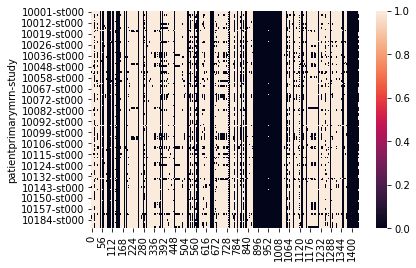

In [358]:
sns.heatmap(X_test.isna())

In [352]:
search.best_estimator_.predict(X_test[num_important_features])

array([1.22801198, 1.2279406 , 1.22734399, 1.22801768, 1.22748519,
       1.22750543, 1.22745998, 1.22780705, 1.22799421, 1.22741006,
       1.22729038, 1.22797786, 1.2276878 , 1.22803914, 1.22740527,
       1.22766471, 1.22775831, 1.22795607, 1.22801453, 1.22806951,
       1.22755772, 1.22779046, 1.22771388, 1.22768483, 1.2276389 ,
       1.22796913, 1.22796774, 1.22741065, 1.22800072, 1.22795462,
       1.22732366, 1.22797743, 1.22775557, 1.2280168 , 1.22725111,
       1.2272717 , 1.22776019, 1.22754843, 1.22801166, 1.22729422,
       1.22798231, 1.22735835, 1.22749238, 1.2273187 , 1.2273737 ,
       1.22726419, 1.22726469, 1.22791112, 1.22803838, 1.22726178,
       1.22730092, 1.22752727, 1.22742753, 1.2273953 , 1.22754863,
       1.22763618, 1.22790896, 1.22777263, 1.2274817 , 1.22762446,
       1.22725547, 1.22775714, 1.22746321, 1.22726925, 1.22730959,
       1.22768829, 1.22783908, 1.22725602, 1.22725496, 1.22787082,
       1.22803914, 1.22799971, 1.22775127, 1.22731581, 1.22724

In [199]:
(y_test >= 2).sum()

81

In [195]:
thresh_accuracy(y_test, np.clip(X_test.loc[:, X_test.columns.str.startswith('vis')].fillna(2).values.reshape(-1, 15, 2, 2).mean(2).mean(2).mean(1), 0, 5))

0.9176413255360624

In [82]:
X = df[input_features]

In [83]:
[list(X[col].cat.categories) for col in X.select_dtypes(include=['category']).columns]

[['ABpos', 'Aneg', 'Apos', 'Bpos', 'Oneg', 'Opos', 'nan', 'Missing'],
 ['Negatief', 'nan', 'Missing'],
 ['Negatief', 'nan', 'Missing'],
 ['Afwezig', 'nan', 'Missing'],
 ['Afwezig', 'nan', 'Missing'],
 ['Na dialyse',
  'Tijdens dialyse',
  'Voor dialyse',
  "Zittend (5')",
  'nan',
  'Missing'],
 ['Mogelijk onrijpe cellen, Handdif volgt.', 'nan', 'Missing'],
 ['Enterobacter cloacae complex',
  'Enterococcus faecium',
  'Escherichia coli',
  'Geen Bacteriele groei',
  'Negatief',
  'Staphylococcus capitis',
  'Staphylococcus hominis',
  'nan',
  'Missing'],
 ['Geen Bacteriele groei', 'Geen Bacteriële pathogenen', 'nan', 'Missing'],
 ['Geen Bacteriële pathogenen', 'nan', 'Missing'],
 ['Enterobacter cloacae complex',
  'Enterococcus faecium',
  'Geen Bacteriele groei',
  'Staphylococcus epidermidis',
  'nan',
  'Missing'],
 ['Commensale flora',
  'Escherichia coli',
  'Geen Bacteriele groei',
  'Staphylococcus aureus',
  'nan',
  'Missing'],
 ['Geen Bacteriele groei', 'nan', 'Missing'],
 [

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
pipeline = Pipeline([
    ('trans', ColumnTransformer([
        ('cat', Pipeline([
            ('impute', SimpleImputer(strategy='most_frequent')), 
            ('encoder', OrdinalEncoder(categories=[list(X[col].cat.categories) for col in X.select_dtypes(include=['category']).columns]))
        ]), list(X_train.select_dtypes(include=['category']).columns)), 
        ('num', Pipeline([
            ('impute', SimpleImputer(strategy='mean')), 
        ]), list(X_train.select_dtypes(exclude=['category']).columns))
    ])), 
#     ('fs', SequentialFeatureSelector(LGBMRegressor(n_jobs=-1), n_features_to_select=10, cv=3, scoring=make_scorer(thresh_accuracy))), 
    ('reg', LGBMRegressor())
])

In [97]:
# import re
# X_train = X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))
X_train.columns = np.arange(len(X_train.columns))
X_train

0     1     2     3     4     5     6     7     8     \
patientprimarymrn study                                                         
10000             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                  st001   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10002             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10004             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10006             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                       ...   ...   ...   ...   ...   ...   ...   ...   ...   
10723             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10724             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10725             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10726             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10727             st000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                         9     ...      1431      1432      1433      1434  \
patientprimarymrn study        ...                                           
10000             st000   NaN  ... -0.801781 -0.782377 -0.828181 -0.813246   
                  st001   NaN  ... -0.969299 -0.912778 -0.978091 -0.925937   
10002             st000   NaN  ... -0.786934 -0.782035 -0.788118 -0.787955   
10004             st000   NaN  ... -0.921508 -0.913783 -0.923325 -0.921380   
10006             st000   NaN  ... -1.182853 -1.160637 -1.172493 -1.154330   
...                       ...  ...       ...       ...       ...       ...   
10723             st000   NaN  ... -1.325107 -1.291139 -1.300896 -1.268456   
10724             st000   NaN  ... -0.443466 -0.430321 -0.453276 -0.443926   
10725             st000   NaN  ... -0.576377 -0.614030 -0.593091 -0.634042   
10726             st000   NaN  ... -1.162804 -1.142362 -1.182940 -1.165479   
10727             st000   NaN  ... -0.672294 -0.657718 -0.681198 -0.669558   

                             1435      1436      1437      1438  1439   1440  
patientprimarymrn study                                                       
10000             st000 -0.504452 -0.505107 -0.544312 -0.594719  40.0  Vrouw  
                  st001 -0.690218 -0.677172 -0.702991 -0.738225  40.0  Vrouw  
10002             st000 -0.497450 -0.507996 -0.521293 -0.582440  80.0    Man  
10004             st000 -0.732964 -0.738535 -0.748219 -0.802866   NaN    nan  
10006             st000 -0.805863 -0.804756 -0.803570 -0.848794  36.0  Vrouw  
...                           ...       ...       ...       ...   ...    ...  
10723             st000 -0.884078 -0.867174 -0.865012 -0.876103   NaN    nan  
10724             st000 -0.548851 -0.554204 -0.559866 -0.613581   NaN    nan  
10725             st000 -0.594288 -0.594998 -0.613037 -0.662691   NaN    nan  
10726             st000 -0.828100 -0.826074 -0.852157 -0.897253   NaN    nan  
10727             st000 -0.561095 -0.561070 -0.575930 -0.619617   NaN    nan  

[677 rows x 1441 columns]

In [167]:
X_train_no_names = X_train.copy()
X_train_no_names.columns = np.arange(len(X_train_no_names.columns))

X_test_no_names = X_test.copy()
X_test_no_names.columns = np.arange(len(X_test_no_names.columns))

In [170]:
from lightgbm.sklearn import LGBMClassifier
roc_auc_score(y_test>=2, LGBMRegressor(boosting_type='dart').fit(X_train_no_names, y_train).predict(X_test_no_names))

0.9061078622482132

In [171]:
thresh_accuracy(y_test, LGBMRegressor(boosting_type='dart').fit(X_train_no_names, y_train).predict(X_test_no_names))

0.9403954802259886

In [160]:
from sklearn.linear_model import LogisticRegression
roc_auc_score(y_test>=2, LogisticRegression(max_iter=5000).fit(X_train.loc[:, X_train.columns.str.startswith('vis_')], y_train).predict(X_test.loc[:, X_train.columns.str.startswith('vis_')]))

0.8794671864847303

In [147]:
roc_auc_score(df['corads'] >= 2, np.clip(X.loc[:, X.columns.str.startswith('vis')].fillna(2).values.reshape(-1, 15, 2, 2).mean(2).mean(2).mean(1), 0, 5))

0.8958512205057501

In [169]:
roc_auc_score(y_test >= 2, np.clip(X_test.loc[:, X_test.columns.str.startswith('vis')].fillna(2).values.reshape(-1, 15, 2, 2).mean(2).mean(2).mean(1), 0, 5))

0.9176413255360624

In [112]:
(y_train==5).any()

False

In [118]:
def auc_roc(y_true,
            y_pred,
            plot=False,
            classification_report=False,
            only_return_opt_thresh=False,
            only_return_classification_report=False,
            config=None,
            offset=None,
            use_max_prob=False,
            do_softmax=True, ):
    """
    Binary AUC
    """

    if len(np.unique(y_true)) == 1:
        return np.nan

    if y_pred.ndim == 1:
        y_true_post = y_true
        y_pred_post = y_pred
    else:
        # Setting smallest_positive_class, a.k.a. diseased onset

        if offset is None:
            if y_pred.shape[1] == 5 or y_pred.shape[1] == 6:
                offset = 2  # From intermediate AMD
            elif y_pred.shape[1] == 4:
                offset = 1  # From intermediate AMD, assuming No AMD and Early AMD are merged
            elif y_pred.shape[1] == 3:
                offset = 1  # From intermediate AMD, assuming No AMD and Early AMD are merged and
                # two Advanced AMD: GA and Advanced AMD: CNV are merged
            elif y_pred.shape[1] == 2:
                offset = 1  # From intermediate AMD, assuming No AMD and Early AMD are merged (and last
                # three classes are also merged)
            else:
                raise ValueError(f'Incorrect value for y_pred.shape[1]: {y_pred.shape[1]}')

        y_true_post = y_true >= offset

        if use_max_prob:
            y_pred_post = np.max(y_pred, axis=-1)

            # print("y_pred:", y_pred)
            # print("y_pred_post:", y_pred_post)
            # print("alt:", np.sum(softmax(y_pred, axis=-1)[:, offset:], axis=-1))
        else:
            y_pred_post = y_pred
            if do_softmax:
                y_pred_post = softmax(y_pred_post, axis=-1)
            y_pred_post = np.sum(y_pred_post[:, offset:], axis=-1)

    if len(np.unique(y_true_post)) == 1:
        return np.nan

    roc_auc = sklearn.metrics.roc_auc_score(y_true_post, y_pred_post)
    # print("roc_auc:", roc_auc)

    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true_post, y_pred_post)

    opt_thresh = thresholds[np.argmax(tpr - fpr)]

    if only_return_opt_thresh:
        return opt_thresh

    if plot:
        lbl = np.array(['$\leq Early AMD$', '$> Early AMD$'])
        if config is not None:
            if len(config.label_names) == 2:
                lbl = np.array(config.label_names)
        plot_confusion_matrix(y_true_post.astype(int),
                              (y_pred_post >= opt_thresh).astype(int),
                              lbl,
                              title=f'Confusion matrix with opt thresh {opt_thresh}')
        plt.show()

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='ROC curve (area = %0.4f, opt_thresh = %0.4f)' % (roc_auc, opt_thresh))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")

        plt.show()

    if classification_report or only_return_classification_report:
        report = sklearn.metrics.classification_report(y_true_post, y_pred_post >= opt_thresh, output_dict=True)

        if only_return_classification_report:
            return report
        else:
            print('Classification report:')
            print(report)

    return roc_auc

In [86]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\roel\.virtualenvs\diagcovid-ckc2berq\lib\site-packages
Requires: joblib, threadpoolctl, numpy, scipy
Required-by: tune-sklearn, shap, scikit-optimize, probatus, lightgbm, guildai, FLAML


<AxesSubplot:ylabel='patientprimarymrn-study'>

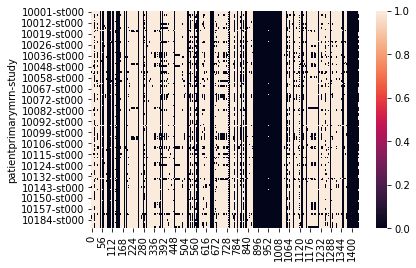

In [59]:
import seaborn as sns
sns.heatmap(X_test.isna())

In [60]:
X_test

,,0,1,2,3,4,5,6,7,8,9,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
patientprimarymrn,study,,,,,,,,,,,,,,,,,,,,,
10001,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.858218,-0.832899,-0.857681,-0.836391,-0.776165,-0.778493,-0.774449,-0.825931,NaN,nan
10003,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.210336,0.226256,0.204478,0.216364,-0.512881,-0.514179,-0.530137,-0.580613,NaN,nan
10005,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.010447,-0.998107,-1.022585,-1.013155,-0.832386,-0.835381,-0.850635,-0.900840,85.0,Man
10008,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.832336,-0.803095,-0.824658,-0.799226,-0.947753,-0.951557,-0.951829,-1.004455,71.0,Man
10009,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.229724,-1.205274,-1.216050,-1.194850,-0.853530,-0.845913,-0.847943,-0.887440,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.237291,0.263692,0.227179,0.249156,-0.287540,-0.284714,-0.308313,-0.355384,68.0,Man
10185,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.330756,-0.358316,-0.338974,-0.369389,-0.448104,-0.467467,-0.462573,-0.524305,NaN,nan
10186,st000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.093650,-1.078944,-1.063651,-1.053770,-0.683239,-0.686428,-0.684916,-0.737285,36.0,Vrouw
